In [1]:
# libraries
import numpy as np
from tqdm import tqdm
import tensorflow as tf

# files
import utils
from model import Autoencoder

In [2]:
# the relevant variables are saved from the "Bowtie Drawing Autoencoder" notebook
# so let's try to reproduce that notebook's results to confirm that the saved variables
# have been restored correctly

tf.reset_default_graph()

# same seed
np.random.seed(0)

# same data
data = np.load('full%2Fnumpy_bitmap%2Fbowtie.npy')
data = data/255
np.random.shuffle(data)
eightyPercent = int(np.rint(data.shape[0]*0.8))
X_train = data[:eightyPercent]
X_test = data[eightyPercent:]

# create the same autoencoder model but without training
model = Autoencoder(X_train, X_test)

# instead set the weights with the restored variables
model.saver.restore(model.sess, "bowtie_model/model.ckpt")

INFO:tensorflow:Restoring parameters from bowtie_model/model.ckpt


reconstruction:


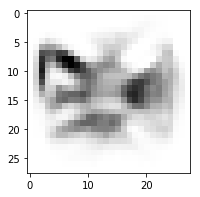

true image:


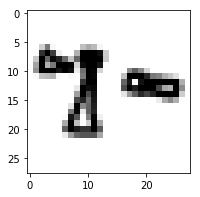

0.0633372


In [3]:
pred_train = model.sess.run(model.decoder, feed_dict={model.X: X_train})

# example 10 (abnormal) from the training data
print("reconstruction:")
utils.plotImgs(np.reshape(pred_train[10], (1,28,28)), 1, 1, figsize=(3,3), cmap='gray_r')

print("true image:")
utils.plotImgs(np.reshape(X_train[10], (1,28,28)), 1, 1, figsize=(3,3), cmap='gray_r')

# example 10 (abnormal) from the training data
c10 = model.sess.run(model.cost, {model.X:np.expand_dims(X_train[10], axis=0)})
print(c10)  # supposed to be 0.06333721429109573